In [1]:

import numpy
import pandas
from matplotlib import pyplot as plt


In [18]:
numpy.set_printoptions(formatter={'int':hex})

In [26]:

def load_memfile(path):
    buf = open(path, 'rb').read()
    arr = numpy.frombuffer(buf, dtype=numpy.uint8)
    return arr

def test_load_memfile():
    arr = load_memfile('x264.core.dat')
    
    # dumped by compr tool
    line0 = [0x21,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0xfd,0xf7,0xff,0x7f,
             0x00,0x00,0x10,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0xff,0xfb,0xeb,0xbf,
             0x00,0x00,0x00,0x00,0x06,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x10,
             0x00,0x00,0x00,0x00,0x00,0x00,0x11,0x00,0x00,0x00,0x00,0x00,0x00,0x00,
             0x64,0x00,0x00,0x00,0x00,0x00,0x00,0x00,]

    
    line9 = [0x18,0x8e,0x03,0x45,0x0e,0x20,0x8d,0x04,0x45,0x0e,0x28,0x8c,0x05,0x48,
             0x0e,0x30,0x86,0x06,0x48,0x0e,0x38,0x83,0x07,0x47,0x0e,0x40,0x6e,0x0e,
             0x38,0x41,0x0e,0x30,0x41,0x0e,0x28,0x42,0x0e,0x20,0x42,0x0e,0x18,0x42,
             0x0e,0x10,0x42,0x0e,0x08,0x00,0x10,0x00,0x00,0x00,0x7c,0x70,0x00,0x00,
             0x88,0xa1,0xfe,0xff,0x05,0x00,0x00,0x00,]
    
    cachelines = arr.reshape((-1,64))
    c_line9 = cachelines[9,:]

    numpy.testing.assert_allclose(c_line9, line9)
    

test_load_memfile()



(43885648,)

In [47]:
arr.shape[0]//4

43885648

In [65]:
# grep -H -B 2 'CR:' baselines/zeropoint/*.results | grep -v 'completed\|--'


def load_baselines():
    df = pandas.read_csv('results.csv')
    return df
    
    
df = load_baselines()
df.head(n=3)

,dataset,method,cr
0,bwaves,SC2,1.64012
1,bwaves,0block,1.00055
2,bwaves,ZeroPoint,1.64021


method
0block       AxesSubplot(0.125,0.125;0.775x0.755)
1.31324      AxesSubplot(0.125,0.125;0.775x0.755)
SC2          AxesSubplot(0.125,0.125;0.775x0.755)
ZeroPoint    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

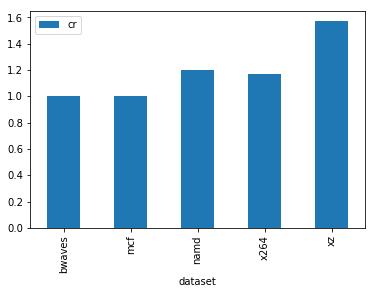

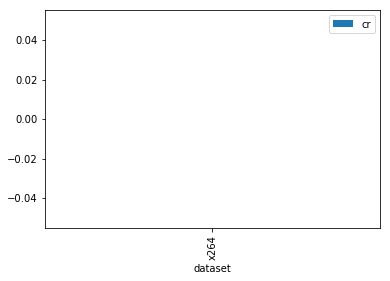

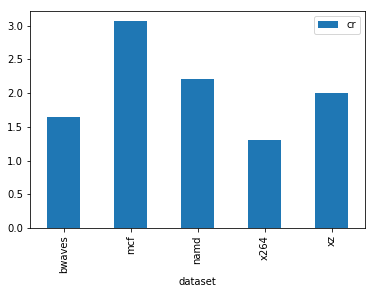

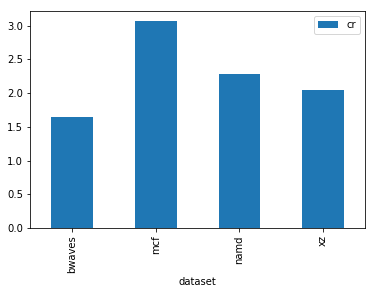

In [66]:
df.groupby('method').plot(kind='bar',y='cr',x='dataset')

In [32]:

def try_lz4(path):
    import lz4.frame
    
    uncompressed = open(path, 'rb').read()
    
    compressed = lz4.frame.compress(uncompressed)
    ratio = len(uncompressed)/len(compressed)
    print('LZ4 compressed', path, ratio)
    
    
try_lz4('x264.core.dat')


LZ4 compressed x264.core.dat 1.5121638754156623


In [33]:
cachelines = arr.reshape((-1,64))

cachelines.shape


(2742853, 64)

In [53]:
dwords = cachelines.view(dtype=numpy.int32)
dwords.shape

n_zeros = dwords.shape[0]*dwords.shape[1] - numpy.count_nonzero(dwords)
n_zeros

7521405

In [36]:
dwords[0]

array([0x21, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0x0, 0xfd, 0xf7,
       0xff, 0x7f, 0x0, 0x0], dtype=uint8)

In [ ]:
baselines/zeropoint/bwaves.results-18-SC2
baselines/zeropoint/bwaves.results:20:CR: 1.64012
baselines/zeropoint/bwaves.results-23-NULL
Compression: 99% completed.results-24-
baselines/zeropoint/bwaves.results:25:CR: 1.00055
--
baselines/zeropoint/bwaves.results-29-ZeroPoint's Hybrid Compression
Compression: 99% completed.results-30-
baselines/zeropoint/bwaves.results:31:CR: 1.64021
--
baselines/zeropoint/mcf.results-18-SC2
Compression: 98% completedsults-19-
baselines/zeropoint/mcf.results:20:CR: 3.06867
--
baselines/zeropoint/mcf.results-23-NULL
Compression: 98% completedsults-24-
baselines/zeropoint/mcf.results:25:CR: 1.00046
--
baselines/zeropoint/mcf.results-29-ZeroPoint's Hybrid Compression
Compression: 98% completedsults-30-
baselines/zeropoint/mcf.results:31:CR: 3.06894
--
baselines/zeropoint/namd.results-18-SC2
Compression: 97% completedesults-19-
baselines/zeropoint/namd.results:20:CR: 2.20796
--
baselines/zeropoint/namd.results-23-NULL
Compression: 97% completedesults-24-
baselines/zeropoint/namd.results:25:CR: 1.1985
--
baselines/zeropoint/namd.results-29-ZeroPoint's Hybrid Compression
Compression: 97% completedesults-30-
baselines/zeropoint/namd.results:31:CR: 2.28635
--
baselines/zeropoint/x264.results-18-SC2
Compression: 95% completedesults-19-
baselines/zeropoint/x264.results:20:CR: 1.298
--
baselines/zeropoint/x264.results-23-NULL
Compression: 95% completedesults-24-
baselines/zeropoint/x264.results:25:CR: 1.16696
--
baselines/zeropoint/x264.results-29-ZeroPoint's Hybrid Compression
Compression: 95% completedesults-30-
baselines/zeropoint/x264.results:31:CR: 1.31324
--
baselines/zeropoint/xz.results-18-SC2
Compression: 99% completedults-19-
baselines/zeropoint/xz.results:20:CR: 2.002
--
baselines/zeropoint/xz.results-23-NULL
Compression: 99% completedults-24-
baselines/zeropoint/xz.results:25:CR: 1.5731
--
baselines/zeropoint/xz.results-29-ZeroPoint's Hybrid Compression
Compression: 99% completedults-30-
baselines/zeropoint/xz.results:31:CR: 2.0487